# Problem 4: Training a simple neural net

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 4c)
Begin by loading MNIST as numpy arrays

In [2]:
from torchvision import datasets
data = datasets.MNIST('data', train=True, download=True)
X_numpy = data.train_data.numpy()/255
y_numpy = data.train_labels.numpy()
print(X_numpy.shape, y_numpy.shape)

(60000, 28, 28) (60000,)


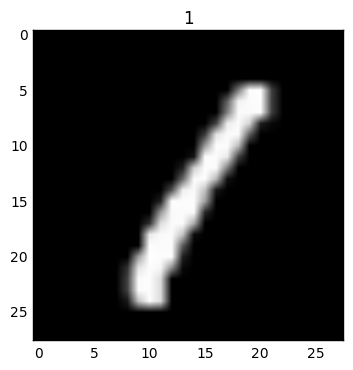

In [3]:
def draw_MNIST(image, label = ''):
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.show()
img_ind = 3
draw_MNIST(X_numpy[img_ind], y_numpy[img_ind])

In [4]:
def onehot(integer_labels):
    #Return matrix whose rows are onehot encodings of integers.
    onehotL = np.zeros((len(integer_labels), len(np.unique(integer_labels))), dtype='uint8')
    onehotL[np.arange(len(integer_labels)), integer_labels] = 1
    return onehotL

y_numpy_onehot = onehot(y_numpy)
print(y_numpy_onehot.shape)

(60000, 10)


In [5]:
# Problem 2.ii (Vectorizing)
X_numpy_vec = X_numpy.reshape(60000,-1)

# Problem 2.iii (Split)
N_train = 40000
train_img = X_numpy_vec[0:N_train,]
train_label = y_numpy_onehot[0:N_train,]
print(train_img.shape, train_label.shape)

test_img = X_numpy_vec[N_train:,]
test_label = y_numpy_onehot[N_train:]
print(test_img.shape, test_label.shape)

(40000, 784) (40000, 10)
(20000, 784) (20000, 10)


### Prepare mini-batch

In [6]:
batch_size = 4
def mbatch_MNIST(img, label, ind):
    sample_img = img[ind,]
    sample_label = label[ind,]
    return (sample_img, sample_label)
ind = np.random.permutation(train_label.shape[0]).reshape(-1,batch_size)

### MNIST 2-layer neural net with ReLU

In [7]:
def feed_forward(X, weights):
    a = [None, None, None]
    a[0] = X
    a[1] = np.maximum(a[0].dot(weights[0]), 0)
    a[2] = np.maximum(a[1].dot(weights[1]), 0)
    return a

def grads(X, Y, weights):
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    delta = a[2] - Y
    grads[1] = a[1].T.dot(delta)
    delta = (a[1] > 0) * delta.dot(weights[1].T)
    grads[0] = a[0].T.dot(delta)
    return grads / len(X)


weights = [np.random.randn(*w) * 0.1 for w in [(784, 100), (100, 10)]]
num_epochs, batch_size, learn_rate = 30, 20, 0.1

for i in range(num_epochs):
    ind = np.random.permutation(train_label.shape[0]).reshape(-1,batch_size)
    for j in range(0, ind.shape[0]):
        X, Y = mbatch_MNIST(train_img, train_label, ind[j,:])
        weights -= learn_rate * grads(X, Y, weights)
    prediction = np.argmax(feed_forward(test_img, weights)[-1], axis=1)
    print ('Epoch',i, 'Accuracy',100*np.mean(prediction == np.argmax(test_label, axis=1)))

Epoch 0 Accuracy 93.66
Epoch 1 Accuracy 95.28
Epoch 2 Accuracy 95.83
Epoch 3 Accuracy 96.02000000000001
Epoch 4 Accuracy 96.235
Epoch 5 Accuracy 96.44500000000001
Epoch 6 Accuracy 96.54
Epoch 7 Accuracy 96.61
Epoch 8 Accuracy 96.73
Epoch 9 Accuracy 96.85000000000001
Epoch 10 Accuracy 96.95
Epoch 11 Accuracy 96.89999999999999
Epoch 12 Accuracy 97.02
Epoch 13 Accuracy 97.015
Epoch 14 Accuracy 97.11
Epoch 15 Accuracy 97.14
Epoch 16 Accuracy 97.205
Epoch 17 Accuracy 97.055
Epoch 18 Accuracy 97.15
Epoch 19 Accuracy 97.14
Epoch 20 Accuracy 97.23
Epoch 21 Accuracy 97.15
Epoch 22 Accuracy 97.2
Epoch 23 Accuracy 97.22
Epoch 24 Accuracy 97.2
Epoch 25 Accuracy 97.21499999999999
Epoch 26 Accuracy 97.24000000000001
Epoch 27 Accuracy 97.18
Epoch 28 Accuracy 97.295
Epoch 29 Accuracy 97.18


### Problem 4a: $N$-alternating points problem

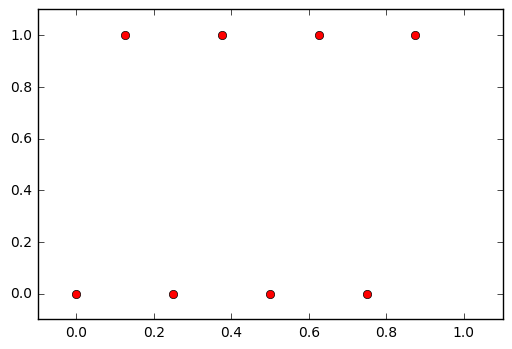

In [8]:
N = 3
X = np.linspace(0, 1-2**(-N), num=2**N).reshape(2**N,1)
y = np.empty((2**N,1))
y[::2] = 0  # even entries are 0
y[1::2] = 1 # odd entries are 1

plt.plot(X,y, 'ro')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()

In [9]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],50) # Using 2 Nodes
        self.weights2   = np.random.rand(50,4)
        self.weights3   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        #print(self.input.shape,self.weights1.shape)
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer2, self.weights3))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights3 = np.dot(self.layer2.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights2 = np.dot(self.layer1.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights3.T) * sigmoid_derivative(self.layer2)))
        d_weights1 = np.dot(self.input.T,  (np.dot(np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights3.T), self.weights2.T) * sigmoid_derivative(self.layer1))   )

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.weights3 += d_weights3

In [10]:
nn = NeuralNetwork(X,y)
for i in range(10000):
    nn.feedforward()
    nn.backprop()

print('Prediction:\n',nn.output)

Prediction:
 [[0.02302204]
 [0.97542065]
 [0.17937187]
 [0.66876458]
 [0.68804391]
 [0.68975784]
 [0.68993772]
 [0.68995801]]


In [11]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],8)
        self.weights2   = np.random.rand(8,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        #print(self.input.shape,self.weights1.shape)
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T), self.weights1.T) * sigmoid_derivative(self.layer1))   )

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2


In [12]:
nn = NeuralNetwork(X,y)
for i in range(100000):
    nn.feedforward()
    nn.backprop()

print('Prediction:\n',nn.output)

Prediction:
 [[0.43393439]
 [0.43392502]
 [0.43391564]
 [0.43390624]
 [0.43389681]
 [0.43388735]
 [0.43387784]
 [0.43386827]]


In [13]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],2) # Using 2 Nodes
        self.weights2   = np.random.rand(2,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        #print(self.input.shape,self.weights1.shape)
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2


X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

for i in range(10000):
    nn.feedforward()
    nn.backprop()
print('Prediction:\n',nn.output)

Prediction:
 [[0.01974128]
 [0.95331427]
 [0.95331427]
 [0.06246238]]
